In [1]:
#Desafio de Inferencia Analise Bivariada - Importaçao das bibliotecas
import pandas as pd
import seaborn as srn
import numpy as np
import statistics  as sts
import matplotlib.pyplot as plt

In [2]:
Df2 = pd.read_csv('DesAnaliseUni.csv')
Df2

,Unnamed: 0.1,Unnamed: 0,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,...,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,phq9,phq_grp,Etnia,Graderenci_Pag
0,0,0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Sem Sintomas,Mexicano-americano,Aderencia baixa
1,1,1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0.0,Sem Sintomas,Outro,Aderencia adequada
2,2,2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0.0,Sem Sintomas,Mexicano-americano,Aderencia acima
3,3,3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0.0,Sem Sintomas,Mexicano-americano,Aderencia acima
4,4,4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,...,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,4.0,Sem Sintomas,Negro não-hispanico,Aderencia acima
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5329,5329,5329,41466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,4.633477,0.000000,6.580006,8.393244,9.360990,59.949915,2.0,Sem Sintomas,Outro-hispanico,Aderencia baixa
5330,5330,5330,41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,...,4.780282,3.134216,1.986137,5.850269,10.000000,57.747869,10.0,Sintomas Moderados,Branco não-hispanico,Aderencia adequada
5331,5331,5331,41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323,2.0,Sem Sintomas,Outro,Aderencia adequada
5332,5332,5332,41472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.090534,8.409844,8.936854,3.063795,0.000000,46.134467,0.0,Sem Sintomas,Mexicano-americano,Aderencia baixa


In [3]:
# dropando a coluna ID
Df2 = Df2.drop('Unnamed: 0',axis=1)

In [4]:
Df2 = Df2.drop('Unnamed: 0.1',axis=1)
Df2.head(10)

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,phq9,phq_grp,Etnia,Graderenci_Pag
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Sem Sintomas,Mexicano-americano,Aderencia baixa
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0.0,Sem Sintomas,Outro,Aderencia adequada
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0.0,Sem Sintomas,Mexicano-americano,Aderencia acima
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0.0,Sem Sintomas,Mexicano-americano,Aderencia acima
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,4.0,Sem Sintomas,Negro não-hispanico,Aderencia acima
5,31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.002362,5.223435,7.787420,0.000000,10.000000,46.086131,6.0,Sintomas Leves,Mexicano-americano,Aderencia acima
6,31144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.209888,6.747360,0.000000,7.473184,6.573559,37.388008,0.0,Sem Sintomas,Negro não-hispanico,Aderencia acima
7,31149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.780404,0.000000,5.138144,5.601160,4.677064,41.001689,0.0,Sem Sintomas,Mexicano-americano,Aderencia baixa
8,31150,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.660037,9.368343,9.253592,10.000000,8.797673,71.671972,1.0,Sem Sintomas,Mexicano-americano,Aderencia acima
9,31151,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,2.805860,9.298090,10.000000,6.738039,0.000000,47.002405,3.0,Sem Sintomas,Outro,Aderencia baixa


In [5]:
# Agrupamento dos dados baseado no atributo 'RIAGENDR/phq9', contando e somando os registros
agrupGen = Df2.groupby(['RIAGENDR'])['phq9'].sum()
agrupGen


RIAGENDR
1    5411.0
2    7912.0
Name: phq9, dtype: float64

<AxesSubplot:xlabel='RIAGENDR'>

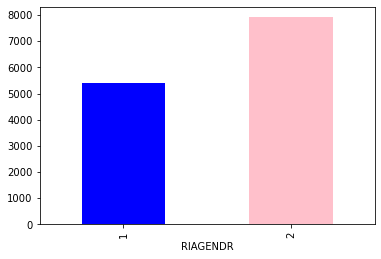

In [6]:
# Gráfico de barras
agrupGen.plot.bar(color = ['blue','pink'])

In [7]:
# Agrupamento dos dados baseado no atributo 'RIDAGEYR/phq9', contando e somando os registros
agrupIdade = Df2.groupby(['RIDAGEYR','RIAGENDR'])['phq9'].sum()
agrupIdade


RIDAGEYR  RIAGENDR
Adult     1           1687.0
          2           2855.0
MidAge    1           2086.0
          2           3053.0
Senior    1           1353.0
          2           1589.0
Name: phq9, dtype: float64

<AxesSubplot:xlabel='RIDAGEYR,RIAGENDR'>

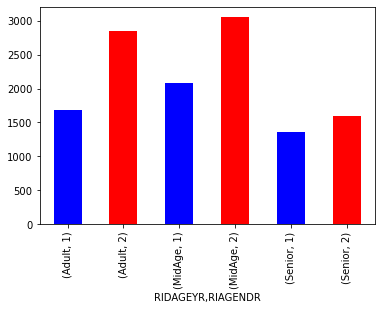

In [8]:
# Gráfico de barras
agrupIdade.plot.bar(color = ['blue','red'])

In [9]:
# Agrupamento dos dados baseado no atributo 'RIDAGEYR/phq9', contando e somando os registros
agrupEtnia = Df2.groupby(['Etnia'])['phq9'].sum()
agrupEtnia


Etnia
Branco não-hispanico    2834.0
Mexicano-americano      6112.0
Negro não-hispanico      501.0
Outro                   3343.0
Outro-hispanico          533.0
Name: phq9, dtype: float64

<AxesSubplot:xlabel='Etnia'>

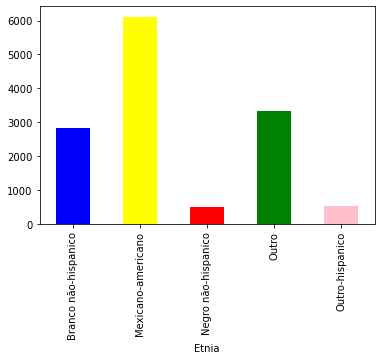

In [10]:
#cores
agrupEtnia.plot.bar(color = ['blue','yellow','red','green','pink','orange'])

In [11]:
# Agrupamento dos dados baseado no atributo 'RIAGENDR/PAG_MINW', contando e somando os registros
agrupGenAtiv = Df2.groupby(['RIAGENDR'])['PAG_MINW'].sum()
agrupGenAtiv


RIAGENDR
1    1.419528e+06
2    1.096870e+06
Name: PAG_MINW, dtype: float64

<AxesSubplot:xlabel='RIAGENDR'>

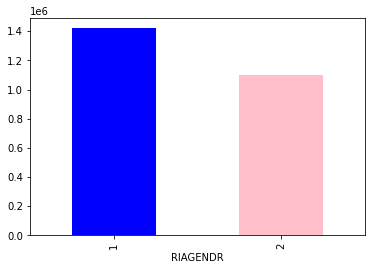

In [12]:
# Gráfico de barras
agrupGenAtiv.plot.bar(color = ['blue','pink'])

In [13]:
# Agrupamento dos dados baseado no atributo 'RIDAGEYR/PAG_MINW'', contando e somando os registros
agrupIdadeAtiv = Df2.groupby(['RIDAGEYR','RIAGENDR'])['PAG_MINW'].sum()
agrupIdadeAtiv


RIDAGEYR  RIAGENDR
Adult     1           505120.755196
          2           449278.577367
MidAge    1           432513.528868
          2           355671.870670
Senior    1           302777.914550
          2           171032.337182
Name: PAG_MINW, dtype: float64

<AxesSubplot:xlabel='RIDAGEYR,RIAGENDR'>

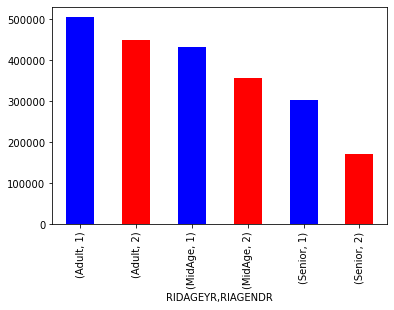

In [14]:
# Gráfico de barras
agrupIdadeAtiv.plot.bar(color = ['blue','red'])

In [15]:
# Agrupamento dos dados baseado no atributo 'REtnia/PAG_MINW'', contando e somando os registros
agrupEtniaAtiv = Df2.groupby(['Etnia'])['PAG_MINW'].sum()
agrupEtniaAtiv


Etnia
Branco não-hispanico    3.943370e+05
Mexicano-americano      1.247864e+06
Negro não-hispanico     7.516113e+04
Outro                   6.796582e+05
Outro-hispanico         1.193784e+05
Name: PAG_MINW, dtype: float64

<AxesSubplot:xlabel='Etnia'>

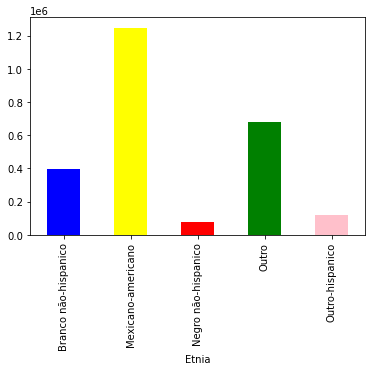

In [16]:
#cores
agrupEtniaAtiv.plot.bar(color = ['blue','yellow','red','green','pink','orange'])

In [17]:
 #Agrupamento dos dados baseado no atributo 'RIAGENDR/'HEI2015_TOTAL_SCORE contando e somando os registros
agrupGenTotscore = Df2.groupby(['RIAGENDR'])['HEI2015_TOTAL_SCORE'].sum()
agrupGenTotscore


RIAGENDR
1    118901.752127
2    133953.640380
Name: HEI2015_TOTAL_SCORE, dtype: float64

<AxesSubplot:xlabel='RIAGENDR'>

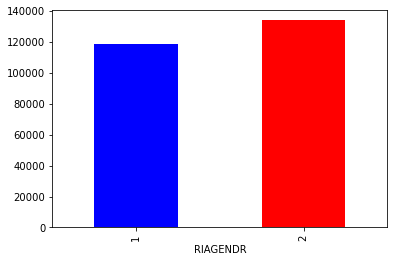

In [18]:
# Gráfico de barras
agrupGenTotscore.plot.bar(color = ['blue','red'])

In [19]:
# Agrupamento dos dados baseado no atributo 'RIDAGEYR/'HEI2015_TOTAL_SCORE, contando e somando os registros
agrupIdadetotscore = Df2.groupby(['RIDAGEYR'])['HEI2015_TOTAL_SCORE'].sum()
agrupIdadetotscore


RIDAGEYR
Adult     79989.235883
MidAge    88133.142698
Senior    72349.660587
Name: HEI2015_TOTAL_SCORE, dtype: float64

<AxesSubplot:xlabel='RIDAGEYR'>

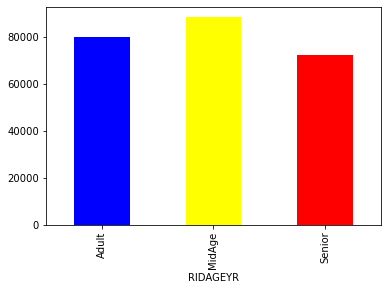

In [20]:
#cores
agrupIdadetotscore.plot.bar(color = ['blue','yellow','red'])

In [21]:
# Agrupamento dos dados baseado no atributo 'REtnia/PAG_MINW'', contando e somando os registros
agrupEtniatotscore = Df2.groupby(['Etnia'])['HEI2015_TOTAL_SCORE'].sum()
agrupEtniatotscore


Etnia
Branco não-hispanico     55070.608451
Mexicano-americano      120634.301164
Negro não-hispanico       7855.910538
Outro                    58635.591172
Outro-hispanico          10658.981183
Name: HEI2015_TOTAL_SCORE, dtype: float64

<AxesSubplot:xlabel='Etnia'>

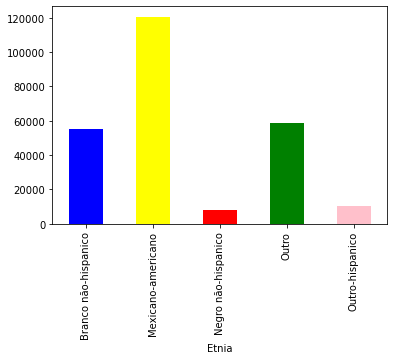

In [22]:
#cores
agrupEtniatotscore.plot.bar(color = ['blue','yellow','red','green','pink','orange'])

In [23]:
# Agrupamento dos dados baseado no atributo 'Graderenci_Pag/phq9 contando e somando os registros
agrupAtiv_phq9 = Df2.groupby(['Graderenci_Pag'])['phq9'].sum()
agrupAtiv_phq9

Graderenci_Pag
Aderencia acima       4833.0
Aderencia adequada    1915.0
Aderencia baixa       6575.0
Name: phq9, dtype: float64

<AxesSubplot:xlabel='Graderenci_Pag'>

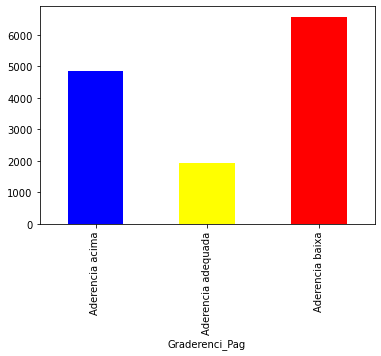

In [24]:
#cores
agrupAtiv_phq9.plot.bar(color = ['blue','yellow','red'])

In [25]:
# Agrupamento dos dados baseado no atributo 'Graderenci_Pag/phq9 contando e somando os registros
Heic1 = Df2.groupby(['phq_grp'])['HEI2015C1_TOTALVEG'].sum()
Heic1

phq_grp
Not Specified                       25.979944
Sem Sintomas                     13174.834190
Sintomas Leves                    2139.785904
Sintomas ModeradamenteSeveros      183.098430
Sintomas Moderados                 617.713671
Sintomas Severos                    71.277576
Name: HEI2015C1_TOTALVEG, dtype: float64

<AxesSubplot:xlabel='phq_grp'>

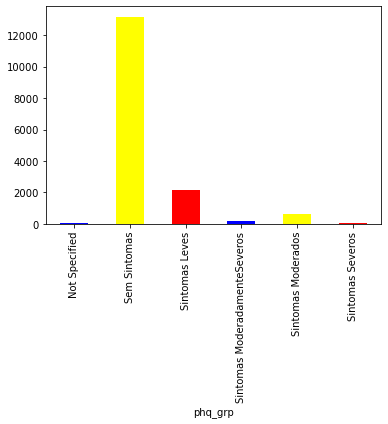

In [26]:
#cores
Heic1.plot.bar(color = ['blue','yellow','red'])

Refazendo alguns pontos para melhorar nossa futura EDA

In [27]:
#Avaliando o percentual de casos faltantes (missing):
Df2.isnull().mean().round(4)*100

SEQN                        0.00
DPQ010                      9.34
DPQ020                      9.34
DPQ030                      9.34
DPQ040                      9.34
DPQ050                      9.34
DPQ060                      9.34
DPQ070                      9.34
DPQ080                      9.34
DPQ090                      9.34
RIAGENDR                    0.00
RIDAGEYR                    5.64
RIDRETH1                    0.00
DMDEDUC                     0.00
INDFMINC                    0.88
PAG_MINW                    0.00
ADHERENCE                   0.00
HEI2015C1_TOTALVEG          5.14
HEI2015C2_GREEN_AND_BEAN    5.14
HEI2015C3_TOTALFRUIT        5.14
HEI2015C4_WHOLEFRUIT        5.14
HEI2015C5_WHOLEGRAIN        5.14
HEI2015C6_TOTALDAIRY        5.14
HEI2015C7_TOTPROT           5.14
HEI2015C8_SEAPLANT_PROT     5.14
HEI2015C9_FATTYACID         5.14
HEI2015C10_SODIUM           5.14
HEI2015C11_REFINEDGRAIN     5.14
HEI2015C12_SFAT             5.14
HEI2015C13_ADDSUG           5.14
HEI2015_TO

In [28]:
#Medidas resumo das variáveis quantitativas:
Df2.drop(columns=['SEQN']).describe(percentiles = [.25, .5, .75, .95, .99]).round(2)

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,...,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,phq9
count,4836.00,4836.00,4836.00,4836.00,4836.00,4836.00,4836.00,4836.00,4836.00,5334.00,...,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5334.00
mean,2.15,1.34,1.99,1.74,1.14,1.23,1.05,1.99,0.46,1.52,...,3.76,4.43,2.59,4.71,4.76,5.80,6.07,6.22,49.97,2.50
std,43.10,32.14,38.01,32.13,28.75,32.14,28.75,43.10,20.34,0.50,...,1.61,1.01,2.17,3.24,3.42,3.50,3.18,3.33,12.32,3.66
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16.06,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,2.59,4.17,0.00,2.02,1.59,2.93,3.70,3.72,41.03,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,...,4.94,5.00,2.59,4.43,4.83,6.23,6.41,6.86,49.51,1.00
75%,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,2.00,...,5.00,5.00,5.00,7.27,7.65,9.25,9.00,9.45,58.17,3.00
95%,2.00,2.00,3.00,3.00,2.00,1.00,1.00,1.00,0.00,2.00,...,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,71.19,10.00
99%,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,1.00,2.00,...,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,79.86,17.00
max,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,2.00,...,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,89.53,27.00


In [29]:
#Agrupando/recategorizando variáveis qualitativas:

#1) Substituindo as categorias 7 e 9 por missing para as variáveis DPQ0X0 e DMDEDUC

#2) Agrupando as categorias 2 e 5 na variável RIDRETH1

#3) Recategorizando a variável INDFMINC com o ponto médio de cada categoria por conter muitas categorias nesta variável. Iremos prosseguir a análise desta variável como uma variável quantitativa

replace_map = {
  "DPQ010": {7: np.nan, 9: np.nan},
  "DPQ020": {7: np.nan, 9: np.nan},
  "DPQ030": {7: np.nan, 9: np.nan},
  "DPQ040": {7: np.nan, 9: np.nan},
  "DPQ050": {7: np.nan, 9: np.nan},
  "DPQ060": {7: np.nan, 9: np.nan},
  "DPQ070": {7: np.nan, 9: np.nan},
  "DPQ080": {7: np.nan, 9: np.nan},
  "DPQ090": {7: np.nan, 9: np.nan},
  "RIDRETH1": {5: 2}, # Other
  "DMDEDUC": {7: np.nan, 9: np.nan},
  "INDFMINC": {1: np.mean([0,4999]), 2: np.mean([5000,9999]), 3: np.mean([10000,14999]),4: np.mean([15000,19999]),
               5: np.mean([20000,24999]),6: np.mean([25000,34999]), 7: np.mean([35000,44999]), 8: np.mean([45000,54999]),
               9: np.mean([55000,64999]), 10: np.mean([65000,74999]), 11: 75000, 12: np.mean([20000, 90000]), 13: np.mean([0, 19999]),
               77: np.nan, 99: np.nan}
}

Df2 = Df2.replace(replace_map)

In [30]:
#Construindo variável phq_grp
conditions = [
  (Df2['phq9'].isna()),
  (Df2['phq9'] <= 5),
  (Df2['phq9'] > 5) & (Df2['phq9'] <= 9),
  (Df2['phq9'] > 9) & (Df2['phq9'] <= 14),
  (Df2['phq9'] > 14) & (Df2['phq9'] <= 19),
  (Df2['phq9'] > 19)
    ]
values = [np.nan, 0, 1, 2, 3, 4]

Df2["phq_grp"] = np.select(conditions, values) # Construindo variável

Df2[["phq_grp"]].value_counts(sort = False) # Avaliando frequencia

phq_grp
0.0        4532
1.0         497
2.0         206
3.0          75
4.0          24
dtype: int64

In [31]:
#Podemos construir novas variáveis a partir da variável phq_grp:
# Agrupando phq_grp em 0 = Sem sintomas, 1 = Sintomas leves, 2 = Sintomas moderados a severos

Df2["phq_grp2"] = Df2["phq_grp"].replace([3, 4], 2)

Df2[["phq_grp2"]].value_counts(sort = False) # Avaliando frequencia

phq_grp2
0.0         4532
1.0          497
2.0          305
dtype: int64

1) Para as etapas de análise exploratória e teste de hipótese, utilizaremos a variável phq_grp2 com 3 níveis de sintomas de depressão.

2) Como o percentual de missing está abaixo de 10% para todas as variáveis, seguiremos a análise utilizando apenas os dados completos.

EDA: Análise Univariada

In [32]:
var_quant = [
    "RIDAGEYR", 
    "INDFMINC", 
    "PAG_MINW", 
    "HEI2015C1_TOTALVEG",
    "HEI2015C2_GREEN_AND_BEAN",
    "HEI2015C3_TOTALFRUIT",
    "HEI2015C4_WHOLEFRUIT",
    "HEI2015C5_WHOLEGRAIN",
    "HEI2015C6_TOTALDAIRY",
    "HEI2015C7_TOTPROT",
    "HEI2015C8_SEAPLANT_PROT",
    "HEI2015C9_FATTYACID",
    "HEI2015C10_SODIUM",
    "HEI2015C11_REFINEDGRAIN",
    "HEI2015C12_SFAT",
    "HEI2015C13_ADDSUG",
    "HEI2015_TOTAL_SCORE",
    "phq9"]

var_quali = [
    "RIAGENDR",
    "RIDRETH1",
    "DMDEDUC",
    "ADHERENCE",
    "phq_grp2"
]

label_quali = {
  "RIAGENDR": {1: 'Masculino', 2: 'Feminino'},
  "RIDRETH1": {1: 'Americano Mexicano', 2: 'Outro', 3: 'Branco \n não hispânico', 4: 'Negro \n não hispânico'},
  "DMDEDUC": {1: "< 9 ano", 2: "9-12 ano", 3: "Ensino \n médio", 4: "Superior \n incompleto", 5: "Superior \n completo"},
  "ADHERENCE": {1: 'Baixo', 2: 'Adequado', 3: 'Acima'},
  "phq_grp2": {0: "Sem sintomas", 1: "Sintomas \n leves", 2: "Sintomas \n moderados-severos"}
}

In [33]:
Df2[var_quant].describe(percentiles = [.25, .5, .75, .95, .99]).round(2)

,INDFMINC,PAG_MINW,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,phq9
count,5174.00,5334.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5334.00
mean,40787.68,471.77,3.20,1.81,2.49,2.36,1.76,3.76,4.43,2.59,4.71,4.76,5.80,6.07,6.22,49.97,2.50
std,24247.24,780.35,1.47,2.14,1.95,2.17,1.92,1.61,1.01,2.17,3.24,3.42,3.50,3.18,3.33,12.32,3.66
min,2499.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16.06,0.00
25%,17499.50,35.00,2.06,0.00,0.45,0.00,0.00,2.59,4.17,0.00,2.02,1.59,2.93,3.70,3.72,41.03,0.00
50%,39999.50,210.00,3.22,0.06,2.32,2.08,1.03,4.94,5.00,2.59,4.43,4.83,6.23,6.41,6.86,49.51,1.00
75%,69999.50,568.93,4.83,4.50,4.94,5.00,3.41,5.00,5.00,5.00,7.27,7.65,9.25,9.00,9.45,58.17,3.00
95%,75000.00,1863.05,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,71.19,10.00
99%,75000.00,3672.06,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,79.86,17.00
max,75000.00,10777.83,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,89.53,27.00


Dado que uma semana tem no máximo 168 horas (10080 minutos) o valor máximo de PAG_MINW não parece ser um valor possível. Nesse caso, iremos truncar o valor de PAG_MINW em 3600 minutos (60h semanais).

In [34]:
Df2['PAG_MINW_trunc'] = np.where(Df2['PAG_MINW'] > 3600, 3600, Df2['PAG_MINW'])

Df2[['PAG_MINW', 'PAG_MINW_trunc']].describe(percentiles = [.25, .5, .75, .95, .99]).round(2)

,PAG_MINW,PAG_MINW_trunc
count,5334.00,5334.00
mean,471.77,454.86
std,780.35,663.05
min,0.00,0.00
25%,35.00,35.00
50%,210.00,210.00
75%,568.93,568.93
95%,1863.05,1863.05
99%,3672.06,3600.00
max,10777.83,3600.00


In [35]:

#Podemos transformar a variável PAG_MINW em horas:
Df2["PAG_HRW"] = Df2["PAG_MINW_trunc"]/60

In [36]:
Df2.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,phq9,phq_grp,Etnia,Graderenci_Pag,phq_grp2,PAG_MINW_trunc,PAG_HRW
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,Mexicano-americano,Aderencia baixa,0.0,0.000000,0.000000
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.438428,3.919226,35.553899,0.0,0.0,Outro,Aderencia adequada,0.0,264.711316,4.411855
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.186877,9.099088,63.551696,0.0,0.0,Mexicano-americano,Aderencia acima,0.0,1353.348730,22.555812
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.863078,5.878686,42.886826,0.0,0.0,Mexicano-americano,Aderencia acima,0.0,1011.478060,16.857968
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,10.000000,9.658507,47.074393,4.0,0.0,Negro não-hispanico,Aderencia acima,0.0,1729.145497,28.819092


In [37]:
#vamos plotar alguns graficos
import seaborn as sns

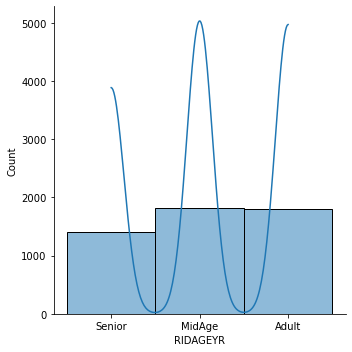

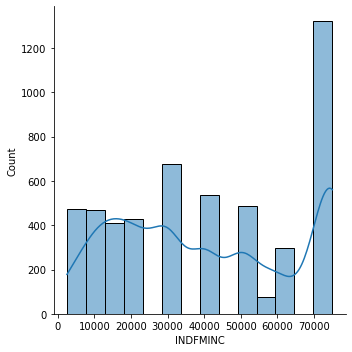

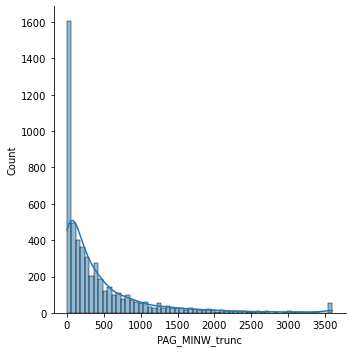

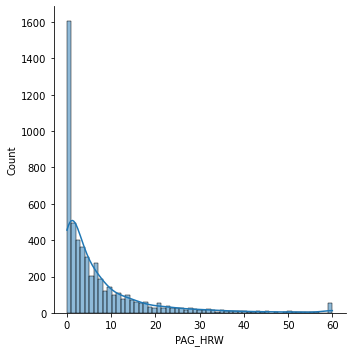

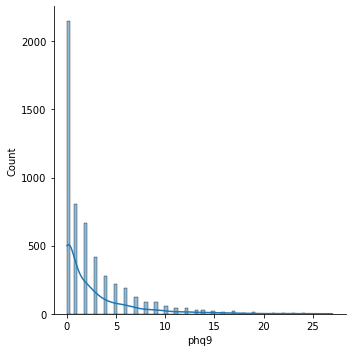

In [38]:
sns.displot(Df2, x="RIDAGEYR", kde=True)
sns.displot(Df2, x="INDFMINC", kde=True)
sns.displot(Df2, x="PAG_MINW_trunc", kde=True)
sns.displot(Df2, x="PAG_HRW", kde=True)
sns.displot(Df2, x="phq9", kde=True)
plt.show()

In [39]:
#Como a variável PAG_HRW é bastante assimétrica, podemos também criar uma versão com o log:
Df2["PAG_HRW_log"] = np.log(Df2["PAG_HRW"] + 1)

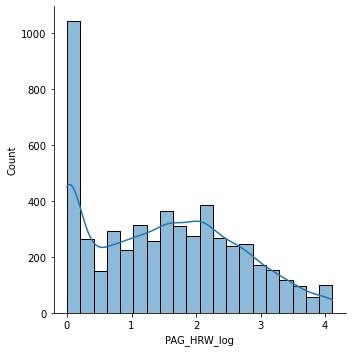

In [40]:
sns.displot(Df2, x="PAG_HRW_log", kde=True)
plt.show()

In [41]:
#Como a variável phq9 é bastante assimétrica, podemos também criar uma versão com o log:
Df2["phq9_log"] = np.log(Df2["phq9"] + 1)

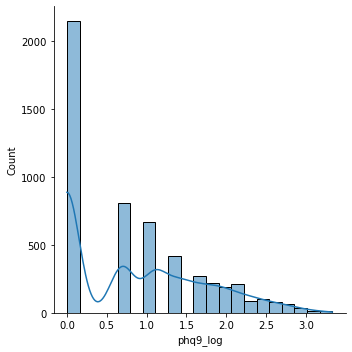

In [42]:
sns.displot(Df2, x="phq9_log", kde=True)
plt.show()

In [43]:
# Função para construir gráfico de barras

def grafico_barras_prop(data, variable):
    (data[[variable]]
     .value_counts(normalize=True, sort = False)
     .rename("Proportion")
     .reset_index()
     .pipe((sns.barplot, "data"), x=variable, y="Proportion"))
    plt.ylim(0,1)
    plt.show()

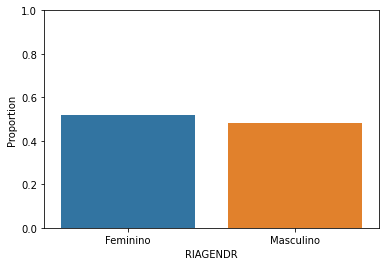

In [44]:
grafico_barras_prop(Df2.replace(label_quali), variable = "RIAGENDR")

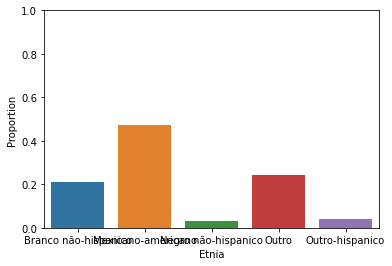

In [45]:
grafico_barras_prop(Df2,variable = "Etnia")

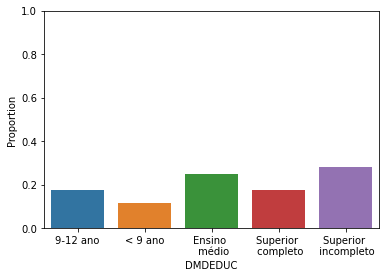

In [46]:
grafico_barras_prop(Df2.replace(label_quali), 
                    variable = "DMDEDUC")

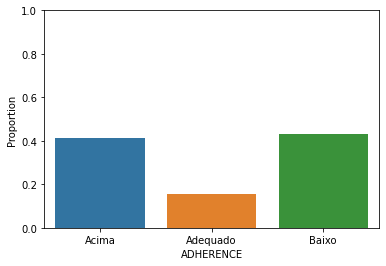

In [47]:
grafico_barras_prop(Df2.replace(label_quali), 
                    variable = "ADHERENCE")

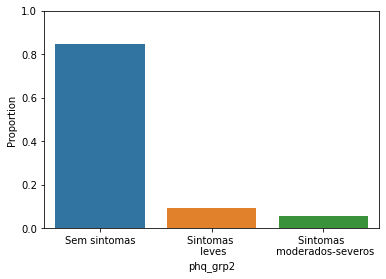

In [48]:
grafico_barras_prop(Df2.replace(label_quali), 
                    variable = "phq_grp2")

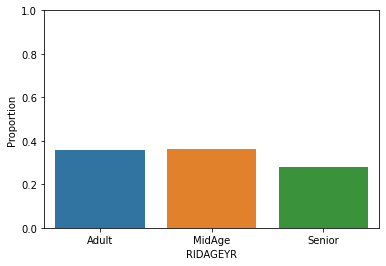

In [49]:
grafico_barras_prop(Df2.replace(label_quali), 
                    variable = "RIDAGEYR")

In [50]:
#EDA: Análise Bivariada + Teste de Hipóteses
#Função para construir gráficos boxplot para uma variável quantitativa versus grupo de depressão

In [51]:
# Função para construir boxplot

def grafico_boxplot_grp(data, variable, label):
    
    if label == "": label = variable
    sns.boxplot(x=variable, y='phq9_log',data=data)
    plt.xlabel(label)
    plt.show()

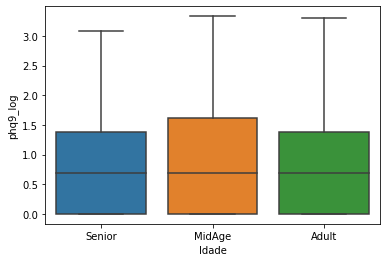

In [52]:
grafico_boxplot_grp(Df2.replace(label_quali), "RIDAGEYR", "Idade")

Teste de hipóteses:

Neste caso queremos comparar a média de nivel de sintomas de depreção para os três grupos de idade. Sendo assim, o teste F da ANOVA será utilizado. Neste teste, decidimos entre a hipótese nula "Não existe diferença entre os grupos de idade com relação à média de depressão" e a hipótese alternativa "Existe pelo menos uma diferença na média de depressão entre os grupos de idade".

In [53]:
from scipy.stats import f_oneway

db_aux = Df2[["phq9_log","RIDAGEYR"]].dropna()

stat, p = f_oneway(db_aux[(db_aux.RIDAGEYR == 'Senior')]["phq9_log"],
                   db_aux[(db_aux.RIDAGEYR == 'MidAge')]["phq9_log"],
                   db_aux[(db_aux.RIDAGEYR == 'Adult')]["phq9_log"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=12.677, p=0.000


Neste caso estamos testando a hipótese nula "Não existe diferença entre os grupos de idade com relação à média de depressão"". Como p < 0.05, temos que a probabilidade de observarmos o que estamos observando nesta amostra é baixa (próxima de zero) se a hipótese nula fosse verdadeira. Neste caso, temos indícios de que a hipótese nula não é verdadeira (rejeitamos a hipótese nula).

Como o teste F apenas nos informa que existe pelo menos uma diferença entre os grupos de idade com relação à média de depressão", iremos realizar comparações multiplas para investigar quais diferenças são signiticativas:

In [54]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(db_aux['phq9_log'],
                  db_aux['RIDAGEYR'],
                  alpha = 0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 Adult MidAge   0.0147 0.8621 -0.0518  0.0812  False
 Adult Senior  -0.1269 0.0001 -0.1981 -0.0557   True
MidAge Senior  -0.1416    0.0 -0.2126 -0.0706   True
----------------------------------------------------


Com as comparações múltiplas, estamos realizando três testes de hipótese simultaneamente. Por conta disso, a função ajusta o valor-p para que o erro máximo desde conjunto de teste de hipóteses seja no máximo alpha = 0.05.

Teste 1: Grupo Adult x MidAge -> p = 0.8621

Teste 2: Grupo Adult x Grupo Senior -> p = 0.001

Teste 3: Grupo MidAge x Grupo Senior -> p = 0.0

Neste caso, rejeitamos somente as duas últimas hipóteses nulas. Sendo assim, temos indícios de que:

A depressão média do grupo Adult é relativamente igual a depressão média do grupo MidAge
A depressão média do grupo Adult é diferente da depressão média do grupo Senior
A depressão média do grupo MidAge é diferente da depressão média do grupo Senior


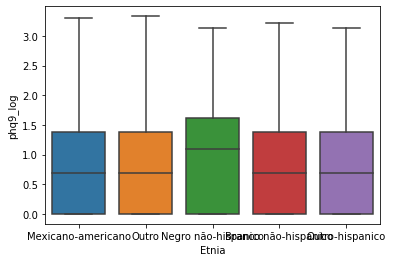

In [55]:
# vamos verificar agora a Etnia
grafico_boxplot_grp(Df2.replace(label_quali), "Etnia", "Etnia")

Teste de hipóteses:

Neste caso queremos comparar a média de nivel de sintomas de depressão para os grupos de Etnia. Sendo assim, o teste F da ANOVA será utilizado. Neste teste, decidimos entre a hipótese nula "Não existe diferença entre os grupos de Etnia com relação à média de depressão" e a hipótese alternativa "Existe pelo menos uma diferença na média de depressão entre os grupos de Etnia".

In [56]:
Df2[["Etnia"]].value_counts(sort = False)

Etnia               
Branco não-hispanico    1133
Mexicano-americano      2516
Negro não-hispanico      164
Outro                   1300
Outro-hispanico          221
dtype: int64

In [57]:
from scipy.stats import f_oneway

db_aux = Df2[["phq9_log","Etnia"]].dropna()

stat, p = f_oneway(db_aux[(db_aux.Etnia == 'Branco não-hispanico')]["phq9_log"],
                   db_aux[(db_aux.Etnia == 'Mexicano-americano')]["phq9_log"],
                   db_aux[(db_aux.Etnia == 'Negro não-hispanico')]["phq9_log"],
                   db_aux[(db_aux.Etnia == 'Outro')]["phq9_log"],
                   db_aux[(db_aux.Etnia == 'Outro-hispanico')]["phq9_log"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=1.181, p=0.317


O valor-p do teste foi p = 0.317. Interpretação do valor-p: Se a hipótese nula fosse verdadeira, qual a probabilidade de observarmos as diferenças que estamos observando na amostra?

Neste caso, a probabilidade é alta (p = 0.317), ou seja, o que estamos observando na amostra é algo bem provável de ocorrer se a hipótese nula for verdadeira e, portanto, não temos indícios para rejeitar a hipótese nula. Sendo assim, não conseguimos detectar uma diferença estatisticamente significativa entre os grupos de Etnia em relação à media de depressão.

In [58]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(db_aux['phq9_log'],
                  db_aux['Etnia'],
                  alpha = 0.05)

print(tukey)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1               group2       meandiff p-adj   lower  upper  reject
------------------------------------------------------------------------------
Branco não-hispanico  Mexicano-americano     0.01 0.9975 -0.0732 0.0933  False
Branco não-hispanico Negro não-hispanico   0.1368 0.3066 -0.0576 0.3311  False
Branco não-hispanico               Outro    -0.01 0.9985 -0.1045 0.0846  False
Branco não-hispanico     Outro-hispanico  -0.0253 0.9944 -0.1964 0.1457  False
  Mexicano-americano Negro não-hispanico   0.1267  0.348 -0.0607 0.3142  False
  Mexicano-americano               Outro    -0.02 0.9594 -0.0994 0.0595  False
  Mexicano-americano     Outro-hispanico  -0.0354 0.9764 -0.1986 0.1278  False
 Negro não-hispanico               Outro  -0.1467 0.2302 -0.3395  0.046  False
 Negro não-hispanico     Outro-hispanico  -0.1621 0.3477 -0.4018 0.0776  False
               Outro     Outro-hispanico  -0.0154 0.

In [59]:
Df2[['DMDEDUC']].value_counts(sort = False)

DMDEDUC
1.0         618
2.0         936
3.0        1335
4.0        1498
5.0         939
dtype: int64

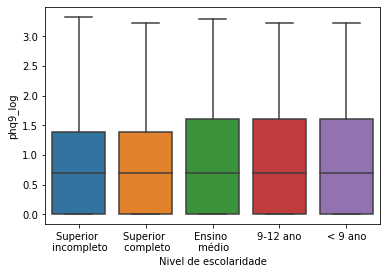

In [60]:
# vamos verificar agora a Escolaridade
grafico_boxplot_grp(Df2.replace(label_quali), "DMDEDUC", "Nivel de escolaridade")

Teste de hipóteses:

Neste caso queremos comparar a média de nivel de sintomas de depressão para os niveis escolaridade. Sendo assim, o teste F da ANOVA será utilizado. Neste teste, decidimos entre a hipótese nula "Não existe diferença entre os niveis de Escolaridade com relação à média de depressão" e a hipótese alternativa "Existe pelo menos uma diferença na média de depressão entre os niveis escolaridade".

In [61]:
from scipy.stats import f_oneway

db_aux = Df2[["phq9_log",'DMDEDUC']].dropna()

stat, p = f_oneway(db_aux[(db_aux.DMDEDUC == 1)]["phq9_log"],
                   db_aux[(db_aux.DMDEDUC == 2)]["phq9_log"],
                   db_aux[(db_aux.DMDEDUC == 3)]["phq9_log"],
                   db_aux[(db_aux.DMDEDUC == 4)]["phq9_log"],
                   db_aux[(db_aux.DMDEDUC == 5)]["phq9_log"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=4.463, p=0.001


Neste caso estamos testando a hipótese nula "Não existe diferença entre os niveis de escolaridade com relação à média de depressão"". Como p < 0.05, temos que a probabilidade de observarmos o que estamos observando nesta amostra é baixa (próxima de zero) se a hipótese nula fosse verdadeira. Neste caso, temos indícios de que a hipótese nula não é verdadeira (rejeitamos a hipótese nula).

Como o teste F apenas nos informa que existe pelo menos uma diferença entre os niveis de escolaridade com relação à média de depressão", iremos realizar comparações multiplas para investigar quais diferenças são signiticativas:

In [62]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(db_aux['phq9_log'],
                  db_aux['DMDEDUC'],
                  alpha = 0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   1.0    2.0   0.0777 0.3971 -0.0427  0.1981  False
   1.0    3.0   0.0281 0.9614  -0.085  0.1411  False
   1.0    4.0   0.0171 0.9935  -0.094  0.1282  False
   1.0    5.0  -0.0828 0.3298 -0.2032  0.0376  False
   2.0    3.0  -0.0496 0.6486 -0.1487  0.0494  False
   2.0    4.0  -0.0606 0.4289 -0.1574  0.0362  False
   2.0    5.0  -0.1605 0.0004 -0.2678 -0.0532   True
   3.0    4.0   -0.011 0.9971 -0.0984  0.0765  False
   3.0    5.0  -0.1109 0.0191 -0.2098 -0.0119   True
   4.0    5.0  -0.0999 0.0389 -0.1966 -0.0032   True
----------------------------------------------------


Com as comparações múltiplas, estamos realizando 5 testes de hipótese simultaneamente. Por conta disso, a função ajusta o valor-p para que o erro máximo desde conjunto de teste de hipóteses seja no máximo alpha = 0.05.

Observamos que|:
Teste 7: Grupo 2.0 "9-12 ano" x grupo 5.0 "Superior \n completo"  -> p = 0.0004
rejeitamos a hipotese nula, ou seja existe diferença ente a media de depressão entre essas grupos. Assim como na comparações dos grupos abaixo:

Teste 9: 3.0 "Ensino \n médio" x 5.0 "Superior \n completo" -> p = 0.0191

Teste 10: 4.0 "Superior \n incompleto" x 5.0 "Superior \n completo" -> p = 0.0389

Vamos verificar agora os grupos que aderem a atividade física
Teste de hipóteses:

Neste caso queremos comparar a média de nivel de sintomas de depressão para os grupos que aderem a atividade física. Sendo assim, o teste F da ANOVA será utilizado. Neste teste, decidimos entre a hipótese nula "Não existe diferença entre os grupos que aderem a atividade física em relação à média de depressão" e a hipótese alternativa "Existe pelo menos uma diferença na média de depressão entre os grupos que aderem a atividade física".

In [63]:
Df2[['ADHERENCE']].value_counts(sort = False)

ADHERENCE
1.0          2304
2.0           834
3.0          2196
dtype: int64

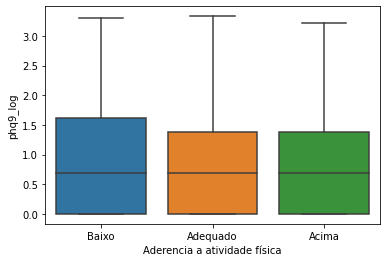

In [64]:
# vamos verificar agora a aderencia a atividade física
grafico_boxplot_grp(Df2.replace(label_quali), "ADHERENCE", "Aderencia a atividade física")

In [65]:
from scipy.stats import f_oneway

db_aux = Df2[["phq9_log","ADHERENCE"]].dropna()

stat, p = f_oneway(db_aux[(db_aux.ADHERENCE == 1)]["phq9_log"],
                   db_aux[(db_aux.ADHERENCE == 2)]["phq9_log"],
                   db_aux[(db_aux.ADHERENCE == 3)]["phq9_log"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=10.189, p=0.000


Como p_value< 0,05, rejeitamos a hipótese nula, ou seja, existe diferença na média de depressão entre os grupos que aderem a atividade física. 

In [66]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(db_aux['phq9_log'],
                  db_aux['ADHERENCE'],
                  alpha = 0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   1.0    2.0  -0.1019 0.0086 -0.1825 -0.0213   True
   1.0    3.0  -0.1077 0.0001 -0.1672 -0.0482   True
   2.0    3.0  -0.0058 0.9847 -0.0869  0.0754  False
----------------------------------------------------


Com as comparações múltiplas, estamos realizando 3 testes de hipótese simultaneamente. Por conta disso, a função ajusta o valor-p para que o erro máximo desde conjunto de teste de hipóteses seja no máximo alpha = 0.05.

Observamos que: 

Teste 1: grupo 1.0 aderencia Baixa" x 2.0 aderencia Adequada -> p = 0.0086 - Rejeitamos a hipótese nula. Existe diferença entre as médias

Teste 1: grupo 1.0 aderencia Baixa" x 3.0 aderencia Acima -> p = 0.0001 - Rejeitamos a hipótese nula. Existe diferença entre as médias

Teste 1: grupo 2.0 aderencia Baixa" x 3.0 aderencia Acima -> p = 0.9847 -  Não Rejeitamos a hipótese nula. Não Existe diferença entre as médias

Agora vomos fazer alguns testes de Hipotese utilizando a variável construida "phq_grp2" (grupo de depressão)

In [71]:
# Função para construir gráficos boxplot para uma variável quantitativa versus grupo de depressão

def grafico_boxplot_grp2(data, variable, label):
    
    if label == "": label = variable
    sns.boxplot(x="phq_grp2", y=variable, data=data)
    plt.ylabel(label)
    plt.show()

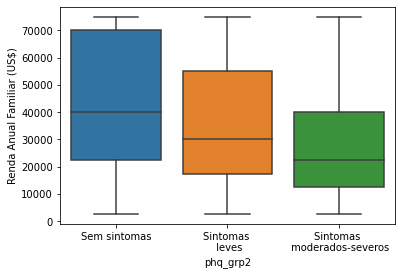

In [72]:
grafico_boxplot_grp2(Df2.replace(label_quali), "INDFMINC", "Renda Anual Familiar (US$)")

In [73]:
from scipy.stats import f_oneway

db_aux = Df2[["phq_grp2", "INDFMINC"]].dropna()

stat, p = f_oneway(db_aux[(db_aux.phq_grp2 == 0)]["INDFMINC"],
                   db_aux[(db_aux.phq_grp2 == 1)]["INDFMINC"],
                   db_aux[(db_aux.phq_grp2 == 2)]["INDFMINC"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=48.829, p=0.000


Neste caso estamos testando a hipótese nula "Não existe diferença entre os grupos de depressão com relação à renda média". Como p < 0.05, temos que a probabilidade de observarmos o que estamos observando nesta amostra é baixa (próxima de zero) se a hipótese nula fosse verdadeira. Neste caso, temos indícios de que a hipótese nula não é verdadeira (rejeitamos a hipótese nula).

Como o teste F apenas nos informa que existe pelo menos uma diferença entre os grupos de sintomas com relação a renda média, iremos realizar comparações multiplas para investigar quais diferenças são signiticativas:

In [74]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(db_aux['INDFMINC'],
                  db_aux['phq_grp2'],
                  alpha = 0.05)

print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2   meandiff  p-adj    lower      upper    reject
-------------------------------------------------------------
   0.0    1.0  -5297.0003   0.0   -8019.881 -2574.1196   True
   0.0    2.0 -13084.0284  -0.0 -16455.5561 -9712.5007   True
   1.0    2.0  -7787.0281   0.0 -11951.1392  -3622.917   True
-------------------------------------------------------------


Com as comparações múltiplas, estamos realizando três testes de hipótese simultaneamente. Por conta disso, a função ajusta o valor-p para que o erro máximo desde conjunto de teste de hipóteses seja no máximo alpha = 0.05.

Teste 1: Grupo 0 (Sem sintomas) x Grupo 1 (sintomas leves) -> p = 0.0

Teste 2: Grupo 0 (Sem sintomas) x Grupo 2 (sintomas moderados-severos) -> p = 0.0

Teste 3: Grupo 1 (sintomas leves) x Grupo 2 (sintomas moderados-severos) -> p = 0.0

Neste caso, rejeitamos todas as hipóteses nulas. Sendo assim, temos indícios de que:

A renda média do grupo Sem sintomas é diferente da renda média do grupo de sintomas leves
A renda média do grupo Sem sintomas é diferente da renda média do grupo de sintomas moderados-severos
A renda média do grupo sintomas leves é diferente da renda média do grupo sintomas moderados-severos

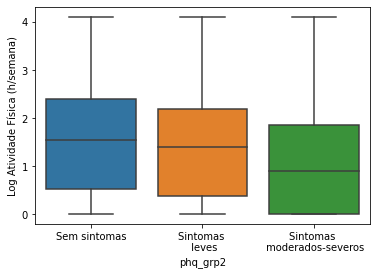

In [77]:
#Vamos verificar agora Hábitos saudáveis x gr. depressão
grafico_boxplot_grp2(Df2.replace(label_quali), "PAG_HRW_log", "Log Atividade Física (h/semana)")

In [79]:
from scipy.stats import f_oneway

db_aux = Df2[["phq_grp2", "PAG_HRW_log"]].dropna()

stat, p = f_oneway(db_aux[(db_aux.phq_grp2 == 0)]["PAG_HRW_log"],
                   db_aux[(db_aux.phq_grp2 == 1)]["PAG_HRW_log"],
                   db_aux[(db_aux.phq_grp2 == 2)]["PAG_HRW_log"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=27.414, p=0.000


In [80]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(db_aux['PAG_HRW_log'],
                  db_aux['phq_grp2'],
                  alpha = 0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0  -0.1274 0.0445 -0.2523 -0.0024   True
   0.0    2.0  -0.4787    0.0 -0.6351 -0.3223   True
   1.0    2.0  -0.3513 0.0001 -0.5436  -0.159   True
----------------------------------------------------



Teste 1: Grupo 0 (Sem sintomas) x Grupo 1 (sintomas leves) -> p = 0.045

Teste 2: Grupo 0 (Sem sintomas) x Grupo 2 (sintomas moderados-severos) -> p = 0.0

Teste 3: Grupo 1 (sintomas leves) x Grupo 2 (sintomas moderados-severos) -> p = 0.0001

Neste caso, rejeitamos todas as hipóteses nulas. Sendo assim, temos indícios de que:

A média dos Habitos saudáveis do grupo Sem sintomas é diferenteda média dos dos hábitos saudáveis do grupo de sintomas leves. A média dos Habitos saudáveis do grupo Sem sintomas é diferente dad média dos dos hábitos saudáveis do grupo de sintomas moderados-severos.A média dos Habitos saudáveis do grupo sintomas leves é diferente da média dos dos hábitos saudáveis do grupo sintomas moderados-severos.

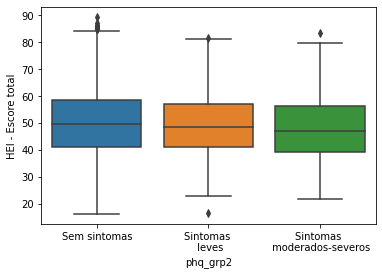

In [82]:
#O Healthy Eating Index (HEI) é uma medida de qualidade da dieta baseada nas orientações dietéticas do governo federal americano (Dietary Guidelines for Americans). 
grafico_boxplot_grp2(Df2.replace(label_quali), "HEI2015_TOTAL_SCORE", "HEI - Escore total")

In [83]:
from scipy.stats import f_oneway

db_aux = Df2[["phq_grp2", "HEI2015_TOTAL_SCORE"]].dropna()

stat, p = f_oneway(db_aux[(db_aux.phq_grp2 == 0)]["HEI2015_TOTAL_SCORE"],
                   db_aux[(db_aux.phq_grp2 == 1)]["HEI2015_TOTAL_SCORE"],
                   db_aux[(db_aux.phq_grp2 == 2)]["HEI2015_TOTAL_SCORE"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=6.849, p=0.001


In [84]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(db_aux['HEI2015_TOTAL_SCORE'],
                  db_aux['phq_grp2'],
                  alpha = 0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0  -1.1131  0.145 -2.5022   0.276  False
   0.0    2.0  -2.4673 0.0025 -4.2045 -0.7301   True
   1.0    2.0  -1.3542 0.2972 -3.4894  0.7809  False
----------------------------------------------------


Teste 1: Grupo 0 (Sem sintomas) x Grupo 1 (sintomas leves) -> p = 0.145

Teste 2: Grupo 0 (Sem sintomas) x Grupo 2 (sintomas moderados-severos) -> p = 0.0025

Teste 3: Grupo 1 (sintomas leves) x Grupo 2 (sintomas moderados-severos) -> p = 0.2972

Neste caso, rejeitamos todas as hipóteses nulas. Sendo assim, temos indícios de que:

1. O HEI médio do grupo Sem sintomas não possue uma diferença estatisticamente significativa  do HEI médio do grupo de sintomas leves
2. O HEI médio do grupo Sem sintomas é diferente do HEI média do grupo de sintomas moderados-severos
3. O HEI médio do grupo sintomas leves não possue uma diferença estatisticamente significativa  do HEI médio do grupo sintomas moderados-severos

 Perfil de hábitos saudáveis

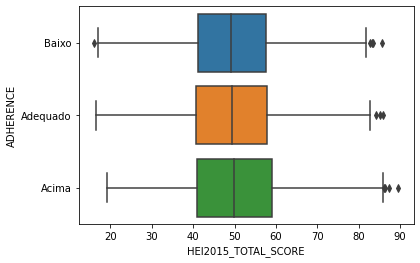

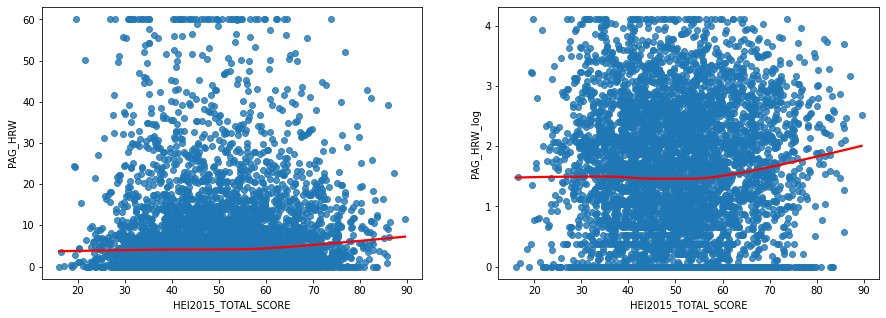

In [85]:
#Alimentação saudável x Exercícios Físicos
sns.boxplot(y="ADHERENCE", 
            x="HEI2015_TOTAL_SCORE", 
            orient="h",
            data=Df2.replace(label_quali))
plt.show()

fig, ax = plt.subplots(ncols=2, figsize=(15,5))

sns.regplot(x = 'HEI2015_TOTAL_SCORE', 
            y = 'PAG_HRW', 
            lowess=True, 
            line_kws={'color': 'red'},
            data = Df2,
            ax = ax[0])

sns.regplot(x = 'HEI2015_TOTAL_SCORE', 
            y = 'PAG_HRW_log', 
            lowess=True, 
            line_kws={'color': 'red'},
            data = Df2,
            ax = ax[1])
plt.show()

In [87]:
from scipy.stats import f_oneway

db_aux = Df2[["ADHERENCE", "HEI2015_TOTAL_SCORE"]].dropna()

stat, p = f_oneway(db_aux[(db_aux.ADHERENCE == 1)]["HEI2015_TOTAL_SCORE"],
                   db_aux[(db_aux.ADHERENCE == 2)]["HEI2015_TOTAL_SCORE"],
                   db_aux[(db_aux.ADHERENCE == 3)]["HEI2015_TOTAL_SCORE"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=4.122, p=0.016


In [88]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(db_aux['HEI2015_TOTAL_SCORE'],
                  db_aux['ADHERENCE'],
                  alpha = 0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   1.0    2.0   0.3937 0.7215  -0.805 1.5924  False
   1.0    3.0   1.0773  0.012  0.1931 1.9616   True
   2.0    3.0   0.6837 0.3768 -0.5185 1.8859  False
---------------------------------------------------


Teste 1: Grupo 1 (Baixo) x Grupo 2 (Adequado) -> p = 0.7215

Teste 2: Grupo 1 (Baixo) x Grupo 3 (Acima) -> p = 0.012

Teste 3: Grupo 2 (Adequado) x Grupo 3 (Acima) -> p = 0.3768

Neste caso, rejeitamos todas as hipóteses nulas. Sendo assim, temos indícios de que:

O HEI médio do grupo Baixo não possue uma diferença estatisticamente significativa do HEI médio do grupo Adequado
O HEI médio do grupo Baixo é diferente do Hei médio do grupo Acima
O HEI médio do grupo Adequado não possue uma diferença estatisticamente significativa do HEI médio do grupo Acima

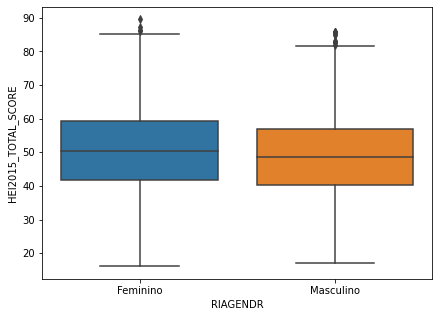

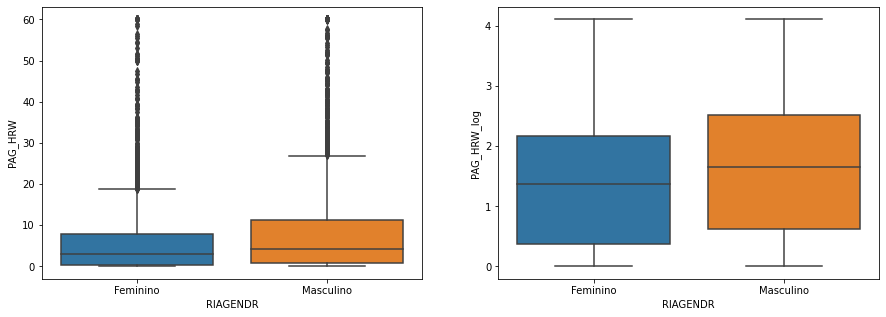

In [90]:
#Hábitos saudáveis x Gênero
plt.figure(figsize=(7,5))
sns.boxplot(x="RIAGENDR", 
            y="HEI2015_TOTAL_SCORE", 
            data=Df2.replace(label_quali))
plt.show()

fig, ax = plt.subplots(ncols=2, figsize=(15,5))
sns.boxplot(x="RIAGENDR", 
            y="PAG_HRW", 
            data=Df2.replace(label_quali),
            ax = ax[0])

sns.boxplot(x="RIAGENDR", 
            y="PAG_HRW_log", 
            data=Df2.replace(label_quali),
            ax = ax[1])
plt.show()

In [91]:
from scipy.stats import f_oneway

db_aux = Df2[["RIAGENDR", "PAG_HRW", "PAG_HRW_log", "HEI2015_TOTAL_SCORE"]].dropna()

stat, p = f_oneway(db_aux[(db_aux.RIAGENDR == 1)]["HEI2015_TOTAL_SCORE"],
                   db_aux[(db_aux.RIAGENDR == 2)]["HEI2015_TOTAL_SCORE"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=27.216, p=0.000


In [93]:
from scipy.stats import f_oneway

db_aux = Df2[["RIAGENDR", "PAG_HRW", "PAG_HRW_log", "HEI2015_TOTAL_SCORE"]].dropna()

stat, p = f_oneway(db_aux[(db_aux.RIAGENDR == 1)]["PAG_HRW_log"],
                   db_aux[(db_aux.RIAGENDR == 2)]["PAG_HRW_log"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=50.329, p=0.000


Neste caso, rejeitamos todas as hipóteses nulas. P < 0.05

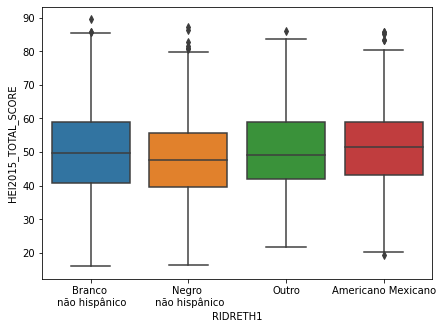

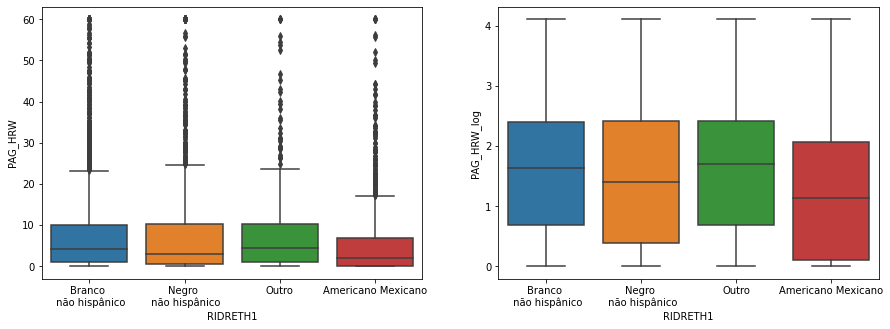

In [95]:
#Haitos saudáveis e Raça
plt.figure(figsize=(7,5))
sns.boxplot(x="RIDRETH1", 
            y="HEI2015_TOTAL_SCORE", 
            data=Df2.replace(label_quali))
plt.show()

fig, ax = plt.subplots(ncols=2, figsize=(15,5))
sns.boxplot(x="RIDRETH1", 
            y="PAG_HRW", 
            data=Df2.replace(label_quali),
            ax = ax[0])

sns.boxplot(x="RIDRETH1", 
            y="PAG_HRW_log", 
            data=Df2.replace(label_quali),
            ax = ax[1])
plt.show()

In [97]:
from scipy.stats import f_oneway

db_aux = Df2[["RIDRETH1", "PAG_HRW", "PAG_HRW_log", "HEI2015_TOTAL_SCORE"]].dropna()

stat, p = f_oneway(db_aux[(db_aux.RIDRETH1 == 1)]["HEI2015_TOTAL_SCORE"],
                   db_aux[(db_aux.RIDRETH1 == 2)]["HEI2015_TOTAL_SCORE"],
                   db_aux[(db_aux.RIDRETH1 == 3)]["HEI2015_TOTAL_SCORE"],
                   db_aux[(db_aux.RIDRETH1 == 4)]["HEI2015_TOTAL_SCORE"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=11.860, p=0.000


In [98]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(db_aux['HEI2015_TOTAL_SCORE'],
                  db_aux['RIDRETH1'],
                  alpha = 0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   -0.964 0.5635 -2.8709   0.943  False
     1      3  -1.0955 0.0717 -2.2543  0.0632  False
     1      4  -2.9767    0.0 -4.2992 -1.6541   True
     2      3  -0.1315 0.9975 -1.8988  1.6357  False
     2      4  -2.0127 0.0302 -3.8914  -0.134   True
     3      4  -1.8812 0.0001 -2.9928 -0.7696   True
----------------------------------------------------


In [99]:
from scipy.stats import f_oneway

stat, p = f_oneway(db_aux[(db_aux.RIDRETH1 == 1)]["PAG_HRW_log"],
                   db_aux[(db_aux.RIDRETH1 == 2)]["PAG_HRW_log"],
                   db_aux[(db_aux.RIDRETH1 == 3)]["PAG_HRW_log"],
                   db_aux[(db_aux.RIDRETH1 == 4)]["PAG_HRW_log"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=25.845, p=0.000


In [100]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(db_aux['PAG_HRW_log'],
                  db_aux['RIDRETH1'],
                  alpha = 0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   0.3757    0.0  0.2016  0.5499   True
     1      3   0.3502    0.0  0.2444   0.456   True
     1      4    0.229    0.0  0.1082  0.3498   True
     2      3  -0.0255 0.9773 -0.1869  0.1359  False
     2      4  -0.1467 0.1239 -0.3183  0.0248  False
     3      4  -0.1212 0.0116 -0.2227 -0.0197   True
----------------------------------------------------
